# Laboratorio de regresión lineal

|                |   |
:----------------|---|
| **Nomb: Terezza Marianne González Jáureguire*     |   |
| **Fe: 26/09/2024cha**      |   |
| **Expedi: 734565ente** |   |   |

La regresión lineal es una heramienta útil para predecir una respuesta cuantitativa. A pesar de que existen soluciones más modernas, la regresión lineal se sigue usando, pues sirve como un punto de partida para comparar otras herramientas.

Se debe comprender cómo funciona la regresión antes de empezar a estudiar métodos de aprendizaje estadístico más complejos.

1. Descarga el archivo de publicidad y carga los datos (Advertising.csv).

In [401]:
import pandas as pd
datos = pd.read_csv("Advertising.csv")#Llamar un archivo
datos

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


**¿Hay alguna relación entre el presupuesto para publicidad y las ventas?**

Nuestra primera meta debe ser determinar si hay evidencia en los datos de que haya una asociación entre estas variables.

- ¿Por qué? ¿Qué resultaría si nos diéramos cuenta de la falta de relación entre el presupuesto de publicidad y las ventas?

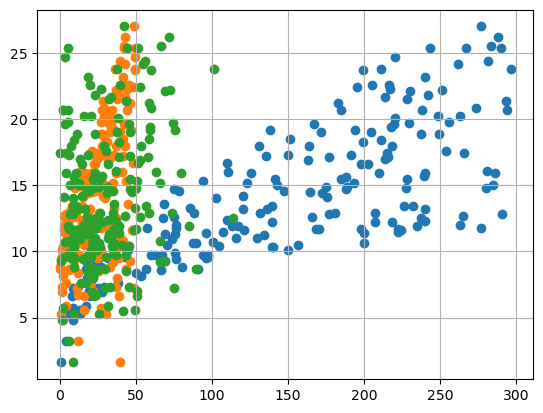

In [403]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
#Algo de código viejito, para que no te estorbe
x1 = datos["TV"]
x2 = datos["radio"]
x3 = datos["newspaper"]
y = datos["sales"] #puntos aleatorios
plt.figure()
plt.scatter(x1, y) #Para puntitos
plt.scatter(x2, y)
plt.scatter(x3, y)
plt.grid()

Si, se puede ver un crecimiento que entre más presupuesto, hay más ventas en la parte. En unos métodos más que otros. Si no hay relación no podriamos sacar tendedias o predicciones de que tan efectiva es esta estrategia. 

**¿Qué tan fuerte es esta relación?**
Asumiendo que existe esta relación, ¿nos sirve conocer el impacto que tiene invertir en publicidad en las ventas?

Si tiene una relación, no es algo proporcional o exacto, pero nos puede dar un acercamiento del impacto o beneficio de invertir en publicidad y por cual medio es mejor.

**¿Cuáles medios están asociados con las ventas? ¿Qué tan grande es la asociación entre un medio específico y las ventas?**

Hay 3 medios distintos en los datos. ¿Sirve invertir en los 3? ¿Conviene más invertir sólo en uno?

**¿Qué tan seguros estamos de que podríamos predecir ventas futuras?**

**¿La relación es lineal?**

**¿Hay sinergia entre estos medios?**

Puede ser que gastar \\$50,000 en publicidad y otros \\$50,000 en radio es mejor opción que gastar \\$100,000 en televisión. A esto le llamamos efecto de interacción.

Podemos usar regresión lineal para responder todas estas preguntas.

## Regresión lineal simple

Un método sencillo para predecir una variable cuantitativa $Y$ dado un solo predictor $X$. Podemos escribir esta relación como:

$$ Y \approx \beta_0 + \beta_1 X$$

Por ejemplo, si decimos que $X$ se refiere a lo gastado en publicidad de TV y que $Y$ son las ventas, podemos buscar:

$$ \text{ventas} \approx \beta_0 + (\beta_1)(\text{TV})$$

A $\beta_0$ y $\beta_1$ se le conoce como los coeficientes o parámetros del modelo. Una vez que usamos los datos históricos para producir estimados $\hat{\beta_0}$ y $\hat{\beta_1}$, podemos predecir ventar futuras basándonos en lo gastado en publicidad en TV usando
$$\hat{y} = \hat{\beta_0} + \hat{\beta_1}x $$

donde $\hat{y}$ indica una predicción de $Y$ basado en $X = x$. (El símbolo $\hat{ }$ se usa para hacer notar que es sólo una estimación de un parámetro desconocido)

### Estimando coeficientes

$\beta_0$ y $\beta_1$ son desconocidos. Se deben estimar usando los datos antes de poder predecir. 

$ (x_1, y_1), (x_2, y_2), ..., (x_n, y_n) $ representa $n$ observaciones, cada una con datos medidos para $X$ y $Y$.

El archivo de publicidad contiene observaciones de 200 mercados y presupuestos usados para publicidad en 3 medios. Nuestra meta actual es encontrar $\hat{\beta_0}$ y $\hat{\beta_1}$ tal que exista un modelo lineal que se ajuste bien a los datos ($y_i \approx \hat{\beta_0} + \hat{\beta_1}x_i$  para $ i=1,...,n$).

Hay muchas formas de medir el ajuste de una curva; la más común es usar el criterio de los mínimos cuadrados. Si $y_i \approx \hat{\beta_0} + \hat{\beta_1}x_i$ es una predicción de $Y$ basada en el valor número $i$ de $X$, entonces definimos el error/residuo como $e_i = y_i - \hat{y_i}$. Este residuo es la diferencia entre el valor observado y el valor estimado por nuestro modelo lineal. Definimos la suma de los residuos cuadrados (RSS) como:
$$ \text{RSS} = e_1^2 + e_2^2 + ... + e_n^2 $$

Utiliza la función `minimize` del módulo `optimize` la librería `scipy` para estimar los parámetros del modelo.

In [405]:
import numpy as np
import scipy.optimize as opt
x = datos['TV'].values
y = datos['sales'].values
n = len(y) 
#y=b0(1)+b1*(x)

ones = np.ones([n, 1])
x_factor = np.reshape(x, [n, 1])
X = np.hstack((ones, x_factor)) 

y_vector=np.reshape(y,[n,1])
n,p=X.shape
beta=np.random.rand(p)

def funcion_costo(beta, x, y):
    n, p = x.shape
    beta = np.reshape(beta, [p, 1])
    y_prediccion = x @ beta
    error = y_prediccion - y
    rss = error.T @ error
    return rss[0, 0]

opt.minimize(funcion_costo, beta, args=(X, y_vector))

  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 2102.5305831324476
        x: [ 7.033e+00  4.754e-02]
      nit: 4
      jac: [ 0.000e+00 -3.052e-05]
 hess_inv: [[ 9.791e-03 -4.981e-05]
            [-4.981e-05  3.397e-07]]
     nfev: 87
     njev: 27

Al resolver el problema analíticamente se encuentra:

$$ \hat{\beta_1} = \frac{\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^n (x_i - \bar{x})^2} $$

$$ \hat{\beta_0} = \bar{y} - \hat{\beta_1}\bar{x} $$


Compara las estimaciones que encontraste con `minimize` con las que se encuentran con la fórmula dada arriba ($\bar{x}$ y $\bar{y}$ son las medias muestrales).

In [407]:
#xi=x
#x linea son las medias
x_media = np.mean(x) #para sacar la media de una lista o vector, np.mean(vector)
y_media = np.mean(y)

Beta1=(np.sum((x - x_media) * (y - y_media)))/(np.sum((x - x_media) ** 2)) #np.sum es para sumatorias
beta0 = y_media - Beta1 * x_media

beta0, Beta1

(7.0325935491276965, 0.047536640433019736)

Pues ya comparando, si son cercanas las estimaciones.

Crea una gráfica donde se muestren las observaciones como una nube de puntos y la línea que ajustaste con regresión.

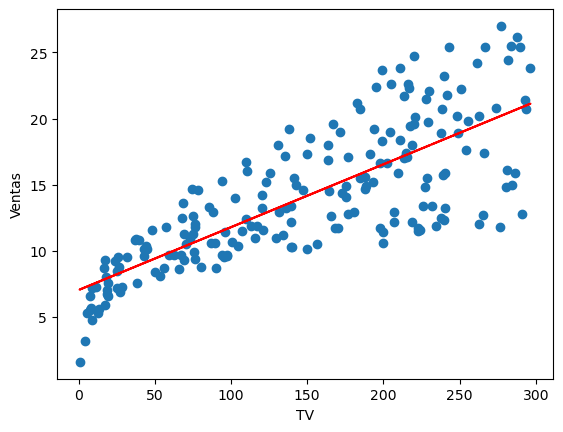

In [409]:
import matplotlib.pyplot as plt

#y=b0(1)+b1*(x)
y_predi = beta0 + Beta1 * x

plt.figure()
plt.scatter(x, y, label='Datos Observados')  # Para puntitos
plt.plot(x, y_predi,"r", label='Línea de Regresión')  # Linea 
plt.xlabel('TV')
plt.ylabel('Ventas')
plt.show()

### Verificando la precisión de nuestros coeficientes estimados

Recuerda que en el mundo real hay ruidos y errores de medición. Siempre se asume que la verdadera relación entre $X$ y $Y$ es $$Y = \beta_0 + \beta_1 X + \epsilon$$

Se asume que el término de error es independiente de $X$ (el error siempre es el mismo sin importar el valor de $X$). Este modelo describe a la *línea de regresión de la población*, que es la mejor aproximación de la verdadera relación entre $X$ y $Y$. Cuando usamos mínimos cuadrados encontramos la *línea de mínimos cuadrados*.

¿Cuál es la diferencia entre población y muestra?

Población: La población incluye todos los posibles elementos o individuos de interés en un estudio. En teoría, la población proporciona la "verdadera" relación entre las variables (la verdadera línea de regresión), pero en la práctica, es difícil o incluso imposible medir a toda la población.

Muestra: Una muestra es un subconjunto de la población que se utiliza para hacer estimaciones o inferencias sobre la población. La muestra es utilizada para construir un modelo (como la línea de regresión) que aproximará la relación en la población.

¿Cuál crees que sea la diferencia entre hacer una regresión con todos los datos de la población y una muestra de ella?

Regresión con todos los datos de la población:

Los coeficientes que se calculan reflejan la "verdadera" relación entre las variables. No hay incertidumbre asociada con estos coeficientes porque representan exactamente la relación en la población completa.
La presencia de ruido o error aún existe, pero se ha contabilizado completamente ya que se han utilizado todos los posibles puntos de datos.

Regresión con una muestra:

Se están utilizando solo una parte de los datos disponibles en la población. Los coeficientes estimados son aproximaciones de los verdaderos valores de la población, hay incertidumbre asociada con las estimaciones. El error de muestreo es una parte importante de la variabilidad, y es posible que la muestra no capture perfectamente las características de la población. Esto puede llevar a estimaciones de la relación que no sean exactas.

La línea de regresión de la población no se puede observar. El concepto de comparar estas líneas es una extensión natural del acercamiento estadístico estándar de usar información de una muestra para estimar características de una población grande.

Imagina que quieres encontrar la altura promedio de un mexicano $\mu$. Medir a todos y cada uno de los mexicanos en situaciones similares, con la misma regla, mismo operador, y otras incontables formas de minimizar la variación de la medida es una tarea imposible. Lo que podemos asumir es que $\hat{\mu} = \bar{y}$. La media poblacional y la media muestral son diferentes, pero la media muestral es usualmente un buen estimado.

De la misma manera, como no contamos con el 100% de la información para hacer una regresión, los coeficientes $\beta_0$ y $\beta_1$ son desconocidos. Podemos estimarlos usando mínimos cuadrados, encontrando $\hat{\beta_0}$ y $\hat{\beta_1}$. Puede que las muestras que tengamos en ese momento estén un poco por encima de la media, pero otras muestras en otro momento puede que estén debajo de la media. En general, esperamos que el promedio de las aproximaciones $\hat{\mu}$ aproxime a $\mu$.

Esto lleva a la pregunta: ¿qué tan cercanos son nuestros coeficientes estimados a los verdaderos coeficientes? Utilizamos el concepto de error estándar para evaluar esto.

$$ \text{Var}(\hat{\mu})=\text{SE}(\hat{\mu})^2 = \frac{\sigma^2}{n} $$

Donde $\sigma$ es la desviación estándar de cada una de las observaciones $y_i$ de $Y$. El error estándar nos dice la cantidad promedio que el estimado difiere del valor verdadero. Podemos ver en la fórmula que entre más observaciones tengamos el error se hace más pequeño. Las fórmulas para errores estándar de $\hat{\beta_0}$ y $\hat{\beta_1}$ son:

$$ \text{SE}(\hat{\beta_0})^2 = \sigma^2 [\frac{1}{n} + \frac{\bar{x}^2}{\sum_{i=1}^n (x_i - \bar{x})^2}]$$

$$ \text{SE}(\hat{\beta_1})^2 = \frac{\sigma^2}{\sum_{i=1}^n (x_i - \bar{x})^2}$$

Error estandar:
$$ \sigma^2 = \text{Var}(\epsilon) = \text{RSE}^2 = \frac{\text{RSS}}{n-2}$$ 


Para que estas fórmulas sean validas asumimos que los errores $\epsilon_i$ tienen varianza común $\sigma^2$ y que no están correlacionados.

Calcula los errores estándar de los coeficientes

In [411]:
y_predi = beta0 + Beta1 * x
error = y-y_predi
rss = error.T @ error
n = len(x)
DesEst=rss/(n-2)

# Calcular los errores estándar para los coeficientes beta_0 y beta_1
x_mediacua = x_media ** 2
sumx = np.sum((x - x_media) ** 2)

SEB1=  DesEst/ sumx
error_estandar_B1= np.sqrt(SEB1)

SEB0 = DesEst * (1/n + x_mediacua / sumx)
error_estandar_B0= np.sqrt(SEB0)

error_estandar_B0,error_estandar_B1

(0.4578429402734785, 0.0026906071877968707)

Estos errores se pueden usar para calcular intervalos de confianza. Un intervalo de confianza del $95\%$ se define como un rango de valores en el cuál se encuentra el desconocido valor verdadero con un $95\%$ de probabilidad.

Otra forma de verlo es que si tomamos muestras repetidas y construimos un intervalo de confianza para cada una, el $95\%$ de los intervalos creados van a contener el valor verdadero. Para la regresión el intervalo de confianza del $95\%$ toma la forma:

$$ \hat{\beta_j} \pm \text2{SE}(\hat{\beta_j})$$

Calcula los intervalos de confianza para los coeficientes estimados:

In [413]:
InterConfiB0p= beta0-(error_estandar_B0*2)
InterConfiB0s= beta0+(error_estandar_B0*2)
InterConfiB1p=Beta1-(error_estandar_B1*2)
InterConfiB1p=Beta1+(error_estandar_B1*2)

InterConfiB0=[InterConfiB0p,InterConfiB0s]
InterConfiB1=[InterConfiB1p,InterConfiB1p]

InterConfiB0,InterConfiB1

([6.1169076685807395, 7.9482794296746535],
 [0.052917854808613475, 0.052917854808613475])

Los errores estándar también se usan para realizar pruebas de hipótesis. La prueba de hipótesis más común es probar la hipótesis nula de:

$$ H_0: \text{No hay relación entre } X \text{ y } Y \ \ \ \ (\beta_1=0)$$

contra la hipótesis alternativa:
$$ H_0: \text{Hay alguna relación entre } X \text{ y } Y \ \ \ (\beta_1 \neq 0)$$

Explica con tus palabras el significado de la hipótesis nula y la hipótesis alternativa.

N nu**Querdadera, cambiar el  ode \(ienea ningúnen s.

Aipótesis a\(Que cambiando el valor de X si tiene efecto en Y, y viceversa. que hay una relación.

Para probar la hipótesis nula debemos determinar si nuestro estimado $\hat{\beta_1}$ de $\beta_1$ está lo suficientemente alejado de cero para que podamos decir con confianza que este valor no es cero. 

¿Qué tan lejos? Depende de qué tanta confianza tengamos en el estimado encontrado. Si nuestro error estándar es pequeño y nuestro estimado está alejado de cero podríamos decir que hay muy poca probabilidad de que el valor verdadero sea 0. En cambio, si nuestro error estándar es grande y nuestro estimado está muy cerca de cero, entonces podrías ser que el valor verdadero sea cero y que no haya relación entre las variables.

Se calcula un *estadístico t* dado por
$$ t = \frac{\hat{\beta_j} - \mu}{\text{SE}(\hat{\beta_j})} $$

donde $\mu$ es el valor contra el que queremos probar.

Calcula el estadístico t para tus coeficientes estimados, usando como referencia la prueba de hipótesis.

In [415]:
mu=0
tB0=(beta0-mu)/error_estandar_B0
tB1=(Beta1-mu)/error_estandar_B1

tB0,tB1

(15.360275174117552, 17.66762560087554)

La distribución t tiene forma de campana y se parece bastante a la distribución normal cuando $n > 30$. Ya sólo es cuestión de calcular la probabilidad de observar cualquier número tal que su valor absoluto sea igual o mayor que el valor absoluto del estadístico t calculado. En otras palabras:
$$ P(|x| \geq |t|) $$

A esta probabilidad la llamamos *p-value*. Un *p-value* pequeño indica que es poco probable que exista por puro azar una relación significativa entre predictor y respuesta, en caso de que no haya una asociación real entre predictor y respuesta. En otras palabras, el *p-value* te dice la probabilidad de que parezca que hay relación cuando no la hay.

Si el *p-value* es pequeño, inferimos que sí hay una asociación entre el predictor y la respuesta, y **rechazamos la hipótesis nula**.
  

¿Qué tan pequeño? Depende de la aplicación. Un valor muy común es del $5\%$.

Utiliza el siguiente código para calcular el *p-value* para tus coeficientes

`from scipy import stats`

`p_bj = 2*(1 - stats.t.cdf(np.abs(t_bj), n-2))`

In [417]:
from scipy import stats

p_B0 = 2*(1 - stats.t.cdf(np.abs(tB0), n-2))
p_B1 = 2*(1 - stats.t.cdf(np.abs(tB1), n-2))

p_B0,p_B1

(0.0, 0.0)

¿Se rechaza la hipótesis nula? ¿Qué significa?

Como el p-value es pequeño, inferimos que sí hay una asociación entre el predictor y la respuesta, y rechazamos la hipótesis nula.

### Verificando la precisión del modelo

Si ya tenemos unos coeficientes de regresión estimados y ya verificamos que la probabilidad de que sí hay relación entre predictor y respuesta es alta. ¿Cómo medimos qué tan bueno es nuestro modelo para predecir?
- RSE (Residual Standard Error)
- $R^2$

#### $R^2$

El RSE se mide con unidades de $Y$, así que no siempre se puede saber cuál es un buen valor. Imagina que tienes un $Y$ con valores entre $-1$ y $1$, y que tienes otro $Y$ con valores entre $1'000,000$ y $100'000,000$. Los errores cuadrados van a ser mucho mayores en el segundo caso que en el primero, pero esto no significa que el modelo creado en el segundo caso sea malo.

El estadístico $R^2$ es una medida de ajuste. Su valor es la proporción de la varianza sí explicada, así que siempre toma valores entre $0$ y $1$. Su fórmula es:

$$ R^2 = \frac{\text{TSS} - \text{RSS}}{\text{TSS}} = 1 - \frac{\text{RSS}}{\text{TSS}}$$
$$ \text{TSS} = \sum_{i=1}^n (y_i - \bar{y})^2$$

TSS mide la varianza total de $Y$. RSS mide la varianza que queda sin explicarse después de la regresión. Entonces TSS-RSS mide la varianza que sí está explicada.

$R^2$ mide la proporción de la varianza en $Y$ que puede ser explicada usando $X$.

Calcula el estadístico $R^2$. ¿Cuánta varianza quedó sin explicar?

In [419]:
tss= np.sum((y - y_media) ** 2)
Rcua=1-(rss/tss)
Rcua

0.611875050850071

In [421]:
Varianza_sin_explicar=1-Rcua
Varianza_sin_explicar

0.388124949149929

Hay 0.388124949149929 sin explicar

Realiza otras dos regresiones. Ya tienes hecha la regresión de ventas dado el gasto en publicidad de TV. Realiza la regresión para gastos en radio y gastos en periódico. Organiza las respuestas para que debajo de esta celda se tenga:
- Título de regresión
- Coeficientes estimados
- Errores estándar de los coeficientes
- Intervalos de confianza
- Estadísticos t
- p-values
- Observaciones

# Regresión para gastos en radio

In [425]:
import numpy as np
import scipy.optimize as opt
x = datos['radio'].values
y = datos['sales'].values
n = len(y) 
#y=b0(1)+b1*(x)

ones = np.ones([n, 1])
x_factor = np.reshape(x, [n, 1])
X = np.hstack((ones, x_factor)) 

y_vector=np.reshape(y,[n,1])
n,p=X.shape
beta=np.random.rand(p)

def funcion_costo(beta, x, y):
    n, p = x.shape
    beta = np.reshape(beta, [p, 1])
    y_prediccion = x @ beta
    error = y_prediccion - y
    rss = error.T @ error
    return rss[0, 0]

opt.minimize(funcion_costo, beta, args=(X, y_vector))

  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 3618.479549025107
        x: [ 9.312e+00  2.025e-01]
      nit: 3
      jac: [ 0.000e+00  3.052e-05]
 hess_inv: [[ 8.629e-03 -2.641e-04]
            [-2.641e-04  1.138e-05]]
     nfev: 45
     njev: 11

In [427]:
#xi=x
#x linea son las medias
x_media = np.mean(x) #para sacar la media de una lista o vector, np.mean(vector)
y_media = np.mean(y)

Beta1=(np.sum((x - x_media) * (y - y_media)))/(np.sum((x - x_media) ** 2)) #np.sum es para sumatorias
beta0 = y_media - Beta1 * x_media

beta0, Beta1

(9.311638095158283, 0.2024957833924397)

In [429]:
y_predi = beta0 + Beta1 * x
error = y-y_predi
rss = error.T @ error
n = len(x)
DesEst=rss/(n-2)

# Calcular los errores estándar para los coeficientes beta_0 y beta_1
x_mediacua = x_media ** 2
sumx = np.sum((x - x_media) ** 2)

SEB1=  DesEst/ sumx
error_estandar_B1= np.sqrt(SEB1)

SEB0 = DesEst * (1/n + x_mediacua / sumx)
error_estandar_B0= np.sqrt(SEB0)

error_estandar_B0,error_estandar_B1

(0.5629004962718711, 0.020411306360090635)

In [431]:
InterConfiB0p= beta0-(error_estandar_B0*2)
InterConfiB0s= beta0+(error_estandar_B0*2)
InterConfiB1p=Beta1-(error_estandar_B1*2)
InterConfiB1p=Beta1+(error_estandar_B1*2)

InterConfiB0=[InterConfiB0p,InterConfiB0s]
InterConfiB1=[InterConfiB1p,InterConfiB1p]

InterConfiB0,InterConfiB1

([8.185837102614542, 10.437439087702025],
 [0.24331839611262096, 0.24331839611262096])

In [433]:
mu=0
tB0=(beta0-mu)/error_estandar_B0
tB1=(Beta1-mu)/error_estandar_B1

tB0,tB1

(16.542245311258217, 9.92076547282496)

In [435]:
from scipy import stats

p_B0 = 2*(1 - stats.t.cdf(np.abs(tB0), n-2))
p_B1 = 2*(1 - stats.t.cdf(np.abs(tB1), n-2))

p_B0,p_B1

(0.0, 0.0)

In [437]:
tss= np.sum((y - y_media) ** 2)
Rcua=1-(rss/tss)
Rcua

0.33203245544529525

In [439]:
Varianza_sin_explicar=1-Rcua
Varianza_sin_explicar

0.6679675445547048

Observaciones: Como el p-value es pequeño, inferimos que sí hay una asociación entre el predictor y la respuesta, y rechazamos la hipótesis nula.

# Regresión para gastos en periódico

In [441]:
import numpy as np
import scipy.optimize as opt
x = datos['newspaper'].values
y = datos['sales'].values
n = len(y) 
#y=b0(1)+b1*(x)

ones = np.ones([n, 1])
x_factor = np.reshape(x, [n, 1])
X = np.hstack((ones, x_factor)) 

y_vector=np.reshape(y,[n,1])
n,p=X.shape
beta=np.random.rand(p)

def funcion_costo(beta, x, y):
    n, p = x.shape
    beta = np.reshape(beta, [p, 1])
    y_prediccion = x @ beta
    error = y_prediccion - y
    rss = error.T @ error
    return rss[0, 0]

opt.minimize(funcion_costo, beta, args=(X, y_vector))

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 5134.8045441119775
        x: [ 1.235e+01  5.469e-02]
      nit: 3
      jac: [ 0.000e+00  0.000e+00]
 hess_inv: [[ 7.445e-03 -1.619e-04]
            [-1.619e-04  5.297e-06]]
     nfev: 18
     njev: 6

In [443]:
#xi=x
#x linea son las medias
x_media = np.mean(x) #para sacar la media de una lista o vector, np.mean(vector)
y_media = np.mean(y)

Beta1=(np.sum((x - x_media) * (y - y_media)))/(np.sum((x - x_media) ** 2)) #np.sum es para sumatorias
beta0 = y_media - Beta1 * x_media

beta0, Beta1

(12.35140706927816, 0.054693098472273355)

In [445]:
y_predi = beta0 + Beta1 * x
error = y-y_predi
rss = error.T @ error
n = len(x)
DesEst=rss/(n-2)

# Calcular los errores estándar para los coeficientes beta_0 y beta_1
x_mediacua = x_media ** 2
sumx = np.sum((x - x_media) ** 2)

SEB1=  DesEst/ sumx
error_estandar_B1= np.sqrt(SEB1)

SEB0 = DesEst * (1/n + x_mediacua / sumx)
error_estandar_B0= np.sqrt(SEB0)

error_estandar_B0,error_estandar_B1

(0.6214201876094345, 0.016575721876358165)

In [449]:
InterConfiB0p= (beta0-error_estandar_B0*2)
InterConfiB0s= (beta0+error_estandar_B0*2)
InterConfiB1p=(Beta1-error_estandar_B1*2)
InterConfiB1p=(Beta1+error_estandar_B1*2)

InterConfiB0=[InterConfiB0p,InterConfiB0s]
InterConfiB1=[InterConfiB1p,InterConfiB1p]

InterConfiB0,InterConfiB1

([11.108566694059292, 13.594247444497029],
 [0.08784454222498969, 0.08784454222498969])

In [451]:
mu=0
tB0=(beta0-mu)/error_estandar_B0
tB1=(Beta1-mu)/error_estandar_B1

tB0,tB1

(19.876095620248947, 3.299590743633418)

In [453]:
from scipy import stats

p_B0 = 2*(1 - stats.t.cdf(np.abs(tB0), n-2))
p_B1 = 2*(1 - stats.t.cdf(np.abs(tB1), n-2))

p_B0,p_B1

(0.0, 0.0011481958688881466)

In [455]:
tss= np.sum((y - y_media) ** 2)
Rcua=1-(rss/tss)
Rcua

0.05212044544430516

In [457]:
Varianza_sin_explicar=1-Rcua
Varianza_sin_explicar

0.9478795545556948

Observaciones: Como el p-value es pequeño, inferimos que sí hay una asociación entre el predictor y la respuesta, y rechazamos la hipótesis nula.

## Regresión lineal múltiple

En lugar de hacer una regresión para cada factor independiente, quizás se puede extender el modelo para que tenga varios factores dentro:

$$ Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + ... + \beta_p X_p + \epsilon $$

Para nuestro ejemplo de publicidad:

$$ \text{sales} = \beta_0 + \beta_1 (\text{TV}) + \beta_2 (\text{radio}) + \beta_3 (\text{newspaper}) + \epsilon $$

Utiliza la función `minimize` para estimar los coeficientes $\beta_0$, $\beta_1$, $\beta_2$ y $\beta_3$

In [459]:
import numpy as np
import scipy.optimize as opt
x1 = datos['TV'].values
x2 = datos['radio'].values
x3 = datos['newspaper'].values
y = datos['sales'].values
n = len(y) 
#y=b0(1)+b1*(x1)+b2*(x2)+b3*(3)

ones = np.ones([n, 1])
x_factor = np.hstack((x1.reshape(n, 1), x2.reshape(n, 1), x3.reshape(n, 1)))
X = np.hstack((ones, x_factor)) 

y_vector=np.reshape(y,[n,1])
n,p=X.shape
beta=np.random.rand(p)

def funcion_costo(beta, x, y):
    n, p = x.shape
    beta = np.reshape(beta, [p, 1])
    y_prediccion = x @ beta
    error = y_prediccion - y
    rss = error.T @ error
    return rss[0, 0]

resultado=opt.minimize(funcion_costo, beta_inicial, args=(X, y_vector))
resultado

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 556.825262903458
        x: [ 2.939e+00  4.576e-02  1.885e-01 -1.038e-03]
      nit: 9
      jac: [ 0.000e+00 -7.629e-06  0.000e+00  0.000e+00]
 hess_inv: [[ 1.712e-02 -4.677e-05 -1.963e-04 -1.040e-04]
            [-4.677e-05  3.424e-07 -7.867e-08 -5.748e-08]
            [-1.963e-04 -7.867e-08  1.305e-05 -3.133e-06]
            [-1.040e-04 -5.748e-08 -3.133e-06  6.066e-06]]
     nfev: 70
     njev: 14

Calcula el RSS y RSE.

In [461]:
y_predi = X @ beta.reshape(-1, 1)
error = y_vector - y_predi
RSS = np.sum(residuos_multi ** 2)
RSS

556.8252629034579

In [463]:
DesEst=rss/(n-2)
RSE=np.sqrt(DesEst)
RSE

5.092480366520192

Dada tu matriz $X$ que contiene todos los factores como columnas, utiliza el siguiente código para encontrar el error estándar de tus estimaciones

`var_beta = np.linalg.inv(X.T @ X) * rse**2`

`std_beta = np.sqrt(var_beta.diagonal())`

El orden de los valores corresponde al orden de los factores en las columnas de la matriz $X$.

In [465]:
var_beta = np.linalg.inv(X.T @ X) * RSE**2

std_beta = np.sqrt(var_beta.diagonal())
std_beta

array([0.94237721, 0.00421444, 0.02601737, 0.01773825])

Calcula los estadísticos t y *p-values* de tus estimaciones.

In [467]:
mu=0
tB0=(resultado.x[0]-mu)/std_beta[0]
tB1=(resultado.x[1]-mu)/std_beta[1]
tB2=(resultado.x[2]-mu)/std_beta[2]
tB3=(resultado.x[3]-mu)/std_beta[1]

tB0,tB1,tB2,tB3

(3.1185964104524193,
 10.858999528835854,
 7.246314249710191,
 -0.24617875269980397)

In [469]:
from scipy import stats

p_B0 = 2*(1 - stats.t.cdf(np.abs(tB0), n-2))
p_B1 = 2*(1 - stats.t.cdf(np.abs(tB1), n-2))
p_B2 = 2*(1 - stats.t.cdf(np.abs(tB2), n-2))
p_B3 = 2*(1 - stats.t.cdf(np.abs(tB3), n-2))

p_B0,p_B1,p_B2,p_B3

(0.002088047681503946, 0.0, 9.350742402602918e-12, 0.8057988800287403)

¿Qué diferencias puedes observar entre los *p-values* de una regresión múltiple y los encontrados en regresiones simples? ¿Por qué crees que existen estas diferencias?

Todos los p-values aumentaron en la multiple, supongo que es porque se evaluan en función de más variableo parámetros. 

## Referencia

James, G., Witten, D., Hastie, T., Tibshirani, R.,, Taylor, J. (2023). An Introduction to Statistical Learning with Applications in Python. Cham: Springer. ISBN: 978-3-031-38746-3